In [103]:
import FinancialAnalysis as FA
import pandas as pd
from difflib import SequenceMatcher
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
%matplotlib inline

In [179]:
mine = './Data/Statement Download 2019-Mar-10 11-35-36.csv'
df = pd.read_csv(mine,skiprows=4, encoding='latin_1')
df = df.drop(columns = "Balance")
df["Transactions"]= df["Transaction type"]
df["Transactions"] += df["Description"]
df = df.drop(columns = "Transaction type")
df = df.drop(columns = "Description")
df['Date'] = pd.to_datetime(df['Date'])

df_mine = df.loc[(df['Date'] > "2019-02-06") & (df['Date'] < "2019-03-05")]

print(df_mine.keys())

joint = './Data/Statement Download 2019-Mar-10 11-35-53.csv'
df = pd.read_csv(joint,skiprows=4, encoding='latin_1')
df = df.drop(columns = "Balance")
df["Transactions"]= df["Transaction type"]
df["Transactions"] += df["Description"]
df = df.drop(columns = "Transaction type")
df = df.drop(columns = "Description")
df['Date'] = pd.to_datetime(df['Date'])
df_joint = df.loc[(df['Date'] > "2019-02-06") & (df['Date'] < "2019-03-05")]
print(df_joint.keys())

creditCard = './Data/Statement Download 2019-Mar-10 11-36-30.csv'
df = pd.read_csv(creditCard,skiprows=4, encoding='latin_1')
print(df.keys())

df = pd.concat([df,df_joint,df_mine],ignore_index = True)

df['Paid out'] = df['Paid out'].str.strip('£').astype(float)
df['Paid in'] = df['Paid in'].str.strip('£').astype(float)
df

Index(['Date', 'Paid out', 'Paid in', 'Transactions'], dtype='object')
Index(['Date', 'Paid out', 'Paid in', 'Transactions'], dtype='object')
Index(['Date', 'Transactions', 'Location', 'Paid out', 'Paid in'], dtype='object')


/Users/philipusher/miniconda3/envs/Financial/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Date,Location,Paid in,Paid out,Transactions
0,06 Feb 2019,ADMISSIONS,NaN,26.00,CHESTER ZOO Contactless
1,06 Feb 2019,CHESTER,NaN,8.20,CO-OP GROUP FOOD Contactless
2,07 Feb 2019,UPTON,NaN,6.50,CHATWINS Contactless
3,08 Feb 2019,CHESTER,NaN,3.00,COUNTESS OF CHESTER HO
4,08 Feb 2019,CHESTER 721,NaN,11.95,SAINSBURYS S/MKTS Contactless
5,08 Feb 2019,CHESTER,NaN,46.32,WM MORRISONS STORE
6,09 Feb 2019,CHESTER,NaN,43.89,TESCO STORE 2261
7,09 Feb 2019,CHESTER 721,NaN,10.00,SAINSBURYS S/MKTS Contactless
8,10 Feb 2019,CHESTER,NaN,9.30,SAINSBURY'S S/MKT Contactless
9,10 Feb 2019,CHESTER,NaN,192.50,ARCHITECT


In [177]:
labels = {'Supermarkets':['TESCO','CO-OP','MORRISONS','SAINSBURYS',"SAINSBURY'S","ALDI",'MORRISON'],
         'Eating Out':["CHATWINS","COSTA",'ARCHITECT','PIPER','BROOKLYN CRAFT','MCDONALDS','HARVESTER','SARNIES OF SHREWSBURY'],
         'Funsies':['CHESTER ZOO','BILLINGTON-DYKES'],
         'Hospital':['COUNTESS'],
         'Car and Trains':['LITTLE ROO','TRANSPORT FOR WALES'],
         'Amazon':['AMAZON','Amazon','AMZN'],
         'EAGE':['EAGE'],
         'Retail':['B&M','CARD FACTORY','MOTHERCARE','THE WORKS','SPORTSDIRECT','WILKO','HOLLAND & BARRETT '],
         'Bills':['NOWTV','PLUSNET',"OVO ENERGY","mortgage","PNET","NETFLIX","Spotify"],
         'Car Loan': ["RCIFINSERV-OMEGA"],
         'Cash':["ATM Withdrawal"],
         'Salary':["ITASCA"],
         'Transfers':["Transfer","NATIONWIDE C/CARD","DIRECT DEBIT PAYMENT"],
         'Childcare':['CHB','CHILDCARE'],
         'Mums Payements':['MRS L USHER'],
         'Interest':['Interest'],
         'Cheque Deposit':['Cheque deposit']
         }


In [211]:
df['Tags']=''
exc_total = 0
exc_totals = []
pie_labels = []
for key in labels.keys():
    ind = 0
    for label in labels[key]:

        ind = ind | df['Transactions'].str.contains(label)
    
    df.loc[ind,'Tags'] = key
    print(str(key) + ' = ' + str(df['Paid out'][ind].sum()))    
    if key != "Transfers":
        exc_total += df['Paid out'][ind].sum()
        exc_totals.append(df['Paid out'][ind].sum())
        pie_labels.append(key)
print('Total (exc. Transfers) = ' + str(exc_total))
df[df["Tags"]=='']


Supermarkets = 386.55999999999995
Eating Out = 284.05
Funsies = 50.0
Hospital = 3.0
Car and Trains = 145.0
Amazon = 20.369999999999997
EAGE = 43.96
Retail = 120.98
Bills = 716.74
Car Loan = 131.9
Cash = 30.0
Salary = 0.0
Transfers = 4115.05
Childcare = 390.0
Mums Payements = 100.0
Interest = 0.0
Cheque Deposit = 0.0
Total (exc. Transfers) = 2422.56


,Date,Location,Paid in,Paid out,Transactions,Tags


In [201]:
df.loc[df["Tags"] != "Transfers","Paid out"].sum()

2422.56

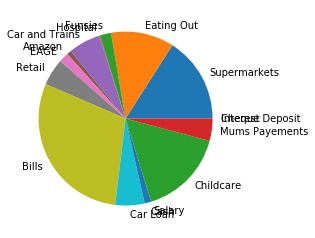

In [215]:
plt.pie(exc_totals,labels = pie_labels)
plt.show()

In [209]:
plt.pie?